# Video Game Sales EDA

This notebook performs exploratory data analysis (EDA) on a video game sales dataset. We will load the data, explore its structure, clean it, and visualize key trends.

In [4]:
# Load Data
import pandas as pd

file_path = 'vgsales.csv'
df = pd.read_csv(file_path)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# Explore Data Structure
print('Columns:', df.columns.tolist())
print('\nData Types:')
print(df.dtypes)
print('\nSample Rows:')
print(df.sample(5))

Columns: ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

Data Types:
Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Sample Rows:
        Rank                         Name Platform    Year       Genre  \
1671    1673               Disney Sing It      Wii  2008.0        Misc   
6642    6644                   Exhibition       XB  2001.0        Misc   
9802    9804               Lost in Shadow      Wii  2010.0    Platform   
16442  16445  Colin McRae Rally 2005 plus      PSP  2005.0      Racing   
12621  12623            Petz Bunnyz Bunch       DS  2011.0  Simulation   

                          Publisher  NA_Sales  EU_Sales  JP_Sales  \
1671     Disney Interactive Studios      0.77 

In [6]:
# Basic Data Cleaning
print('Missing values per column:')
print(df.isnull().sum())

# Example: Drop rows with missing values
df_clean = df.dropna()
print(f'Rows after dropping missing values: {len(df_clean)}')

Missing values per column:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
Rows after dropping missing values: 16291


Top 10 Best-Selling Games:
                        Name Platform    Year         Genre  Global_Sales
0                 Wii Sports      Wii  2006.0        Sports         82.74
1          Super Mario Bros.      NES  1985.0      Platform         40.24
2             Mario Kart Wii      Wii  2008.0        Racing         35.82
3          Wii Sports Resort      Wii  2009.0        Sports         33.00
4   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing         31.37
5                     Tetris       GB  1989.0        Puzzle         30.26
6      New Super Mario Bros.       DS  2006.0      Platform         30.01
7                   Wii Play      Wii  2006.0          Misc         29.02
8  New Super Mario Bros. Wii      Wii  2009.0      Platform         28.62
9                  Duck Hunt      NES  1984.0       Shooter         28.31


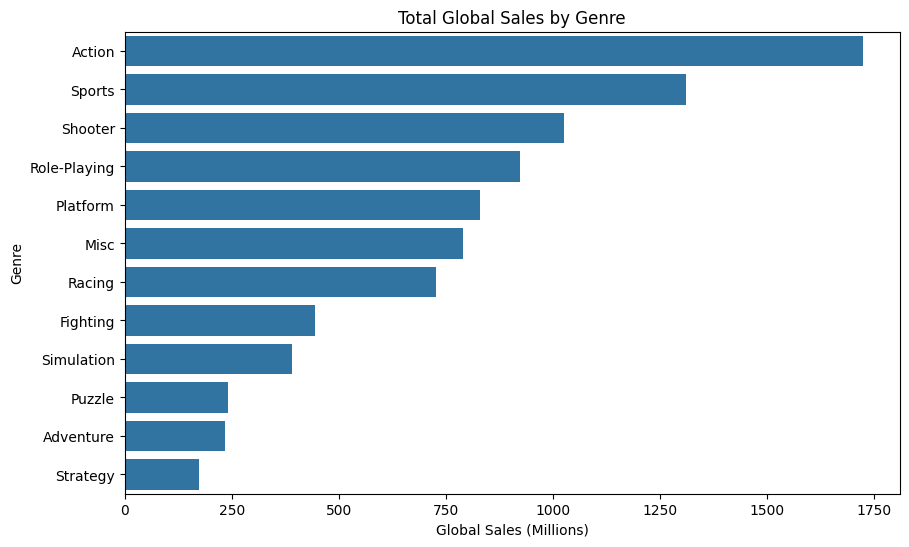

In [7]:
# Further EDA: Top-Selling Games and Sales by Genre
# Top 10 best-selling games
print('Top 10 Best-Selling Games:')
top_games = df_clean.sort_values('Global_Sales', ascending=False).head(10)
print(top_games[['Name', 'Platform', 'Year', 'Genre', 'Global_Sales']])

# Sales by genre
import matplotlib.pyplot as plt
import seaborn as sns
genre_sales = df_clean.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=genre_sales.values, y=genre_sales.index)
plt.title('Total Global Sales by Genre')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Genre')
plt.show()

Top 10 Best-Selling Platforms:
Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
Name: Global_Sales, dtype: float64


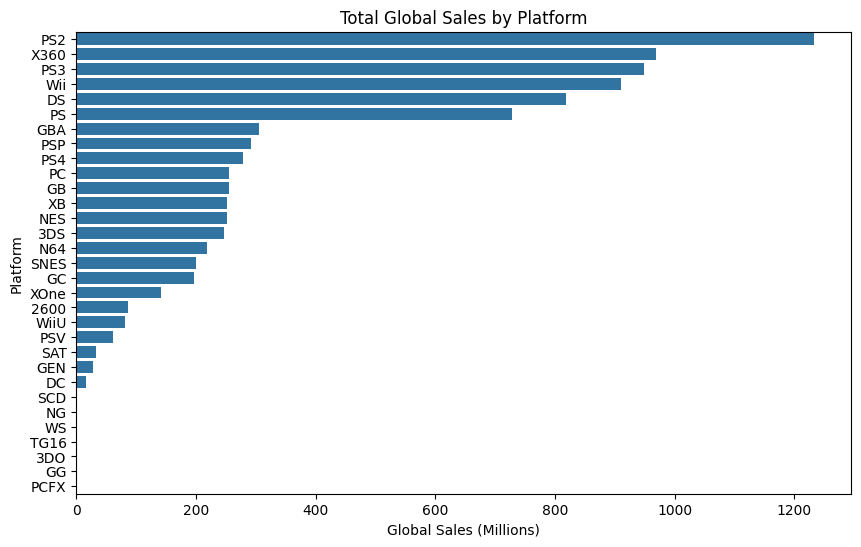

In [8]:
# Further EDA: Top-Selling Games and Sales by Genre
# Top 10 best-selling platforms
print('Top 10 Best-Selling Platforms:')
top_platforms = df_clean.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
print(top_platforms)

# Sales by genre
import matplotlib.pyplot as plt
import seaborn as sns
platform_sales = df_clean.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=platform_sales.values, y=platform_sales.index)
plt.title('Total Global Sales by Platform')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Platform')
plt.show()

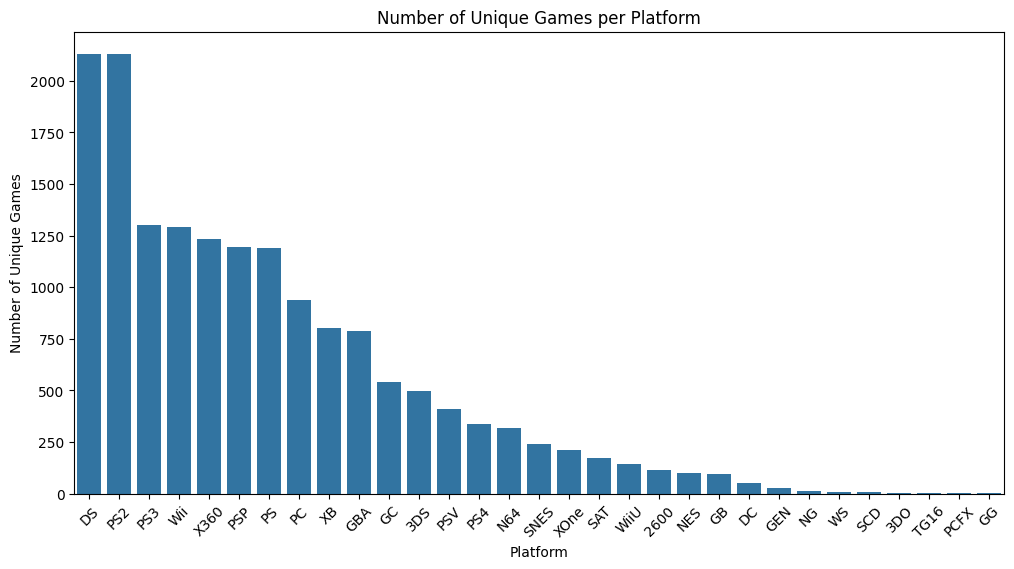

In [9]:
# Sales for games per platform
# Visualizing sales for each platform according to game per platform
# For example how many unique games were published on each platform
unique_games_per_platform = df_clean.groupby('Platform')['Name'].nunique() .sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=unique_games_per_platform.index, y=unique_games_per_platform.values)
plt.title('Number of Unique Games per Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Unique Games')
plt.xticks(rotation=45)
plt.show()


## Games Published on Multiple Platforms

Let's identify games that have been released on more than one platform. This can help us understand which titles have broad market reach and publisher strategies.

In [10]:
# Find games published on more than one platform
multi_platform_games = df_clean.groupby('Name')['Platform'].nunique()
multi_platform_games = multi_platform_games[multi_platform_games > 1]
print(f'Total games published on more than one platform: {len(multi_platform_games)}')
print('Sample of games published on multiple platforms:')
print(multi_platform_games.head(10))

Total games published on more than one platform: 2716
Sample of games published on multiple platforms:
Name
007: Quantum of Solace                                        6
007: The World is not Enough                                  2
11eyes: CrossOver                                             2
18 Wheeler: American Pro Trucker                              2
187: Ride or Die                                              2
2 in 1 Combo Pack: Sonic Heroes / Super Monkey Ball Deluxe    2
2002 FIFA World Cup                                           3
2010 FIFA World Cup South Africa                              4
2014 FIFA World Cup Brazil                                    2
25 to Life                                                    2
Name: Platform, dtype: int64
